## $$Señal\:Analítica\:Y\:sus\:Aplicaciones$$ ##
### $1-Señal\:Analítica\:Y\:Transformada\:de\:Fourier$ ###
La transformada de Fourier de una señal de valor real es simétrica compleja. Implica que el contenido en frecuencias negativas
son redundantes con respecto a las frecuencias positivas.  
La señal analítica tiene valores complejos pero su espectro es unilateral (**solo frecuencia positivas**).  
Por ello se utiliza señales analíticas en el analísis espectral para mitigar terminos cruzados y valores de redundancia debido a los componentes de frecuencia positiva y negativa.  

### $1.1-Análisis\:en\:Tiempo\:Continuo$ ### 
Sea x (t) una señal de energía finita no limitada por banda de valor real, para la cual deseamos construir una
señal analítica z (t). La transformada de Fourier de tiempo continuo (CTFT) de x (t) está dada por:
$$X(f)=\int_{-\infty}^{\infty}x(t)e^{-j2\pi ft}dt$$
![Image](Imagenes/analitico.PNG)
Dado que el espectro de la señal analítica es unilateral, la señal analítica tendrá un valor complejo en el
dominio del tiempo, por lo tanto, la señal analítica se puede representar en términos de componentes reales e imaginarios como:
$$z(t)=z_r(t)+jz_i(t)$$
$$z_r(t)=x(t)\:\:z_i(t)=??$$
La transformada de hilbert va a componer la parte imaginaria de de la señal analitica, que se denotará **"HT{.}"**.
$$z(t)=x(t)+jHT{x(t)}$$
**Nota:** Una propiedad importante es que la parte real e imaginaria son componentes ortogonales:
$$\int_{-\infty}^{\infty}z_i(t)z_r(t)=0$$

### $1.2-Análisis\:en\:Tiempo\:Discreto$ ### 
La señal de valor real x(t), da como N valores discretos tomados en muestras en el intervalo T.
$$X(f)=T\sum_{n=0}^{N-1}x[n]e^{-j2\pi fnT}$$
La propiedad tomada en tiempo continuo se mantiene para el tiempo discreto.
![Image](Imagenes/analitico-2.PNG)
La secuencia para hallar el espectro de frecuencia:
* Calcular los N puntos DTFT de x[n] usando FFT.
* La señal analítica periódica unilateral de N puntos se calcula mediante la siguiente transformada.
![Image](Imagenes/analitica-3.PNG)
* Finalmente, la señal analítica z[n] se obtiene la inversa DFTF de Z[m]
$$z[n]=\frac{1}{NT}\sum_{m=0}^{N-1}z[m]e^{j2\pi mn/N}$$

In [2]:
from IPython.display import Image
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft, ifft

In [3]:
%matplotlib notebook

In [19]:
def señal_anali(x):
    N=x.size
    X1=fft(x,N)
    z=[]
    for i in range(N):
        if i==0:
            z.append(X1[i])
        elif i<=int(N/2-1):
            z.append(2*X1[i])
        elif i<=int(N/2):
            z.append(X1[i])
        else:
            z.append(0)
    otro=np.array(z)
    salida=ifft(otro,N)
    return salida

<IPython.core.display.Javascript object>


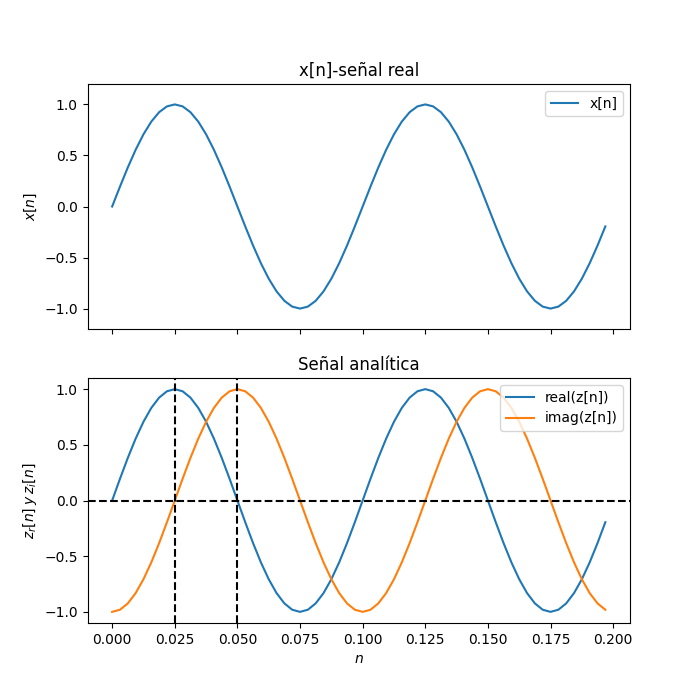

In [30]:
f=10 #frecuencia de la señal
fs=32*f #frecuencia de muestreo
t=np.arange(0,2/f,1/fs)
x=np.sin(2*np.pi*f*t)
hibert=señal_anali(x)


fig, (ax_1, ax_2)=plt.subplots(2,1, sharex=True, figsize=(7,7))
ax_1.plot(t, x, label='x[n]')
ax_1.set_ylabel('$x[n]$')
ax_1.set_title('x[n]-señal real')
ax_1.margins(0, 0.1)
ax_1.legend()

ax_2.plot(t, np.real(hibert), label='real(z[n])')
ax_2.plot(t, np.imag(hibert), label='imag(z[n])')
ax_2.axhline(0, linestyle='--', color='black')
ax_2.axvline(1/(2*f), linestyle='--', color='black')
ax_2.axvline(1/(4*f), linestyle='--', color='black')
ax_2.set_xlabel('$n$')
ax_2.set_ylabel(f'$z_r[n]\:y\:z_i[n]$')
ax_2.set_title('Señal analítica')
ax_2.legend()

fig.show()

## $2-APLICACIONES\:DE\:LA\:SEÑAL\:ANALÍTICA$ ##
La **transformada de Hilbert** y el concepto de señales analítica tienen severas aplicaciones. Mencionaremos 2 de ellas a continuación:
### $2.1-Extracción\:Instantánea\:de\: AMPLITUD,\:FASE\:Y\:FRECUENCIA$ ###
Este concepto es fundamental para comunicación de información y aparece en muchas aplicaciones de procesamiento de señales. Sabemos que una señal monocromática tiene la forma:
$$ x(t)=acos(\omega t+\phi)$$
Estas señales tiene una portadora de información, que se deben **modular** para el envio de información.
### $2.1.1\:MODULACIÓN\:DE\:AMPLITUD\:(AM)$ ###
En este tipo de modulación, el valor de la señal positiva de valores reales $m(t)$ se modula con una portadora $cos(\omega_ct)$. Se representa de la siguiente forma:
$$x(t)=m(t)cos(\omega_ct)$$
DONDE:  
$\omega_c=2\pi f_c$ y el termino m(t) es llamada **amplitud instantánea**
![Image](https://userscontent2.emaze.com/images/42b0d81e-2b46-4251-92fa-1e9de795a70d/9e387b95409ad658f7980184dc56dba9.png)
### $2.1.2\:MODULACIÓN\:DE\:FASE$ ###
En el caso de Modulación de frecuencia y fase son muy similares. El concepto de **fase instantánea** o **frecuencia instantánea** se requiere para describir la modulación de la señal.
$$x(t)=acos(\phi(t))$$
$\phi(t)$ es la fase instantánea que varia en función de la información. Además:
$$\omega(t)=\frac{d}{dt}\phi(t)$$
$$f(t)=\frac{d}{2\pi dt}\phi(t)$$

Una forma de generalizar los conceptos de modulación sería:
$$x(t)=a(t)cos(\phi(t))$$
Donde:
* Amplitud instantánea o la envolvente de la señal viene dada por a(t).
* Fase instantánea es dado por $\phi(t)$.
* Frecuencia angular instantánea es dado por $\omega(t)$.
* Frecuencia temporal instantánea es $f(t)=\frac{d}{2\pi dt}\phi(t)$.  
Una forma de darle solución sería aplicando **Transformada de Hilbert**.
![Image](Imagenes/modulacion.png)
La señal analítica se puede expresar para la modulación como:
$$z(t)=z_r(t)+jz_i(t)=x(t)+jHT{x(t)}$$
Para luego obtener:
* Amplitud instantánea
$$a(t)=|z(t)|=\sqrt{z_{r}^{2}(t)+z_{i}^{2}(t)}$$
* Fase instantánea
$$\phi(t)=\angle z(t)=arctan[\frac{z_i(t)}{z_r(t)}]$$
* Frecuencia instantánea
$$f(t)=\frac{d}{2\pi dt}\phi(t)$$

**EJEMPLO**: Una señal modulada en amplitud se forma multiplicando
una información sinusoidal y un chirrido de frecuencia lineal.
El contenido de información es $a(t)=1+0.7sin(2\pi 3t)$ y frecuencia en la portadora de 20Hz.

<IPython.core.display.Javascript object>


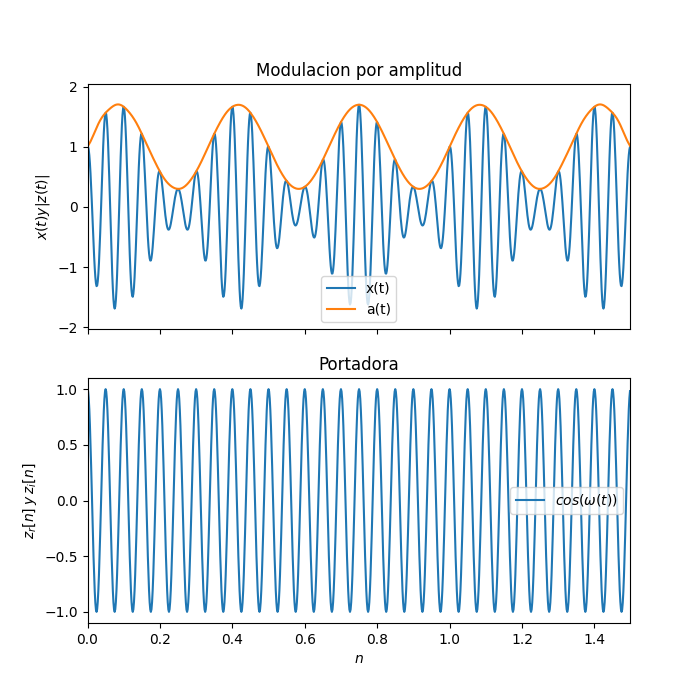

In [43]:
fs=600 #frecuencia de muestro
t=np.arange(0,1.5,1/fs)  #tiempo
a_t=1+0.7*np.sin(2*np.pi*3*t) #señal de información
c_t=np.cos(2*np.pi*20*t) #portadora
modulado=a_t*c_t #señal modulada

analitica=señal_anali(modulado)
amplit_inst=abs(analitica)
fase_inst=np.angle(analitica)

fig, (ax_1, ax_2)=plt.subplots(2,1, sharex=True, figsize=(7,7))
ax_1.plot(t, modulado, label='x(t)')
ax_1.plot(t, amplit_inst, label='a(t)')
ax_1.set_ylabel('$x(t) y |z(t)|$')
ax_1.set_title('Modulacion por amplitud')
ax_1.margins(0, 0.1)
ax_1.legend()

ax_2.plot(t, np.cos(fase_inst), label='$cos(\omega(t))$')
ax_2.set_xlabel('$n$')
ax_2.set_ylabel(f'$z_r[n]\:y\:z_i[n]$')
ax_2.set_title('Portadora')
ax_2.legend()

fig.show()

### $2.1.3-Demodulación\:De\:Fase\:Usando\:Transformada\:de\:Hilbert$ ###
En los sistemas de comunicaciones existen diversos tipos de modulaciones, que se clasifican en: MOD. AMPLITUD, MOD. FRECUENCIA / MOD. FASE.  
En su genérico forma, una señal de fase modulada se expresa como una señal sinusoidal portadora de información que modula otra
señal portadora sinusoidal.
$$x(t)=Acos[2\pi f_ct+\beta+\alpha sin(2\pi f_mt+\theta)]$$
**Donde:**
la portadora de información a modular es m(t)=$\alpha sin(2\pi f_mt+\theta)$, algunas notaciones importantes:
* A- amplitud de la portadora